<a href="https://colab.research.google.com/github/jgamel/learn_n_dev/blob/python_data_prep_cleaning/image_to_array_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Files to Arrays to Image Files 

This example walks through loading image files into arrays, normalizing arrays, and saving arrays as image files.

### Load Libraries and mount drive for saving in Colabs

In [1]:
#import libraries
from keras.preprocessing import image # Keras dataset preprocessing utilities, located at tf. keras. preprocessing , help you go from raw data on disk to a tf. data. Dataset object that can be used to train a model.
import cv2 # cv2 is the module import name for opencv-python
import numpy as np 
from PIL import Image # Python Imaging Library is a free and open-source additional library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### Example 1 

Load image using keras file with size adjustment option.  This example using two stop sign images.

In [2]:
!wget --continue https://raw.githubusercontent.com/jgamel/learn_n_dev/input_data/stop_sign.png -O /tmp/stop_sign.png
!wget --continue https://raw.githubusercontent.com/jgamel/learn_n_dev/input_data/real_stop_sign.jpg -O /tmp/real_stop_sign.jpg


--2022-05-05 18:53:51--  https://raw.githubusercontent.com/jgamel/learn_n_dev/input_data/stop_sign.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3212 (3.1K) [image/png]
Saving to: ‘/tmp/stop_sign.png’

/tmp/stop_sign.png  100%[===================>]   3.14K  --.-KB/s    in 0s      

2022-05-05 18:53:52 (23.3 MB/s) - ‘/tmp/stop_sign.png’ saved [3212/3212]

--2022-05-05 18:53:52--  https://raw.githubusercontent.com/jgamel/learn_n_dev/input_data/real_stop_sign.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2405854 (2.3M) [i

In [3]:
#load image
test_image_1 = image.load_img('/tmp/stop_sign.png', target_size = (128, 128, 1))
test_image_2 = image.load_img('/tmp/real_stop_sign.jpg', target_size = (128, 128, 1))

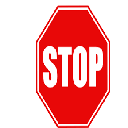

In [4]:
test_image_1

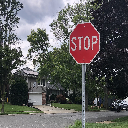

In [5]:
test_image_2

Convert the images into arrays using keras image feature

In [6]:
#convert image to array
test_image_1 = image.img_to_array(test_image_1)
test_image_2 = image.img_to_array(test_image_2)

In [7]:
test_image_1

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [8]:
test_image_2

array([[[ 37.,  43.,  41.],
        [ 52.,  62.,  54.],
        [ 50.,  54.,  65.],
        ...,
        [ 69.,  64.,  71.],
        [ 39.,  36.,  45.],
        [ 57.,  57.,  65.]],

       [[ 36.,  42.,  40.],
        [ 45.,  49.,  48.],
        [ 28.,  31.,  38.],
        ...,
        [ 34.,  34.,  42.],
        [ 60.,  60.,  68.],
        [ 32.,  31.,  39.]],

       [[ 23.,  29.,  27.],
        [ 32.,  37.,  40.],
        [ 21.,  24.,  31.],
        ...,
        [ 32.,  35.,  44.],
        [ 35.,  33.,  44.],
        [ 24.,  24.,  32.]],

       ...,

       [[190., 188., 189.],
        [126., 124., 125.],
        [154., 152., 153.],
        ...,
        [ 84., 103.,  57.],
        [ 80.,  97.,  53.],
        [ 71.,  93.,  47.]],

       [[155., 153., 154.],
        [142., 140., 143.],
        [137., 135., 136.],
        ...,
        [112., 132.,  81.],
        [ 89., 111.,  64.],
        [ 94., 114.,  65.]],

       [[179., 177., 178.],
        [164., 162., 163.],
        [161., 1

Change to grayscale using numpy mean.  Can use np.round([data], 0) if you only need whole numbers.

In [9]:
#rgb values to grayscale
test_image_1x = np.mean(test_image_1, axis=2)
test_image_2x = np.mean(test_image_2, axis=2)

In [10]:
test_image_1x

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)

In [11]:
test_image_2x

array([[ 40.333332,  56.      ,  56.333332, ...,  68.      ,  40.      ,
         59.666668],
       [ 39.333332,  47.333332,  32.333332, ...,  36.666668,  62.666668,
         34.      ],
       [ 26.333334,  36.333332,  25.333334, ...,  37.      ,  37.333332,
         26.666666],
       ...,
       [189.      , 125.      , 153.      , ...,  81.333336,  76.666664,
         70.333336],
       [154.      , 141.66667 , 136.      , ..., 108.333336,  88.      ,
         91.      ],
       [178.      , 163.      , 160.      , ...,  90.333336, 122.333336,
         99.      ]], dtype=float32)

Normalize Array by dividing by 255.

In [12]:
#normalize
test_image_1y = test_image_1x/255.0
test_image_2y = test_image_2x/255.0


In [13]:
test_image_1y

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [14]:
test_image_2y

array([[0.15816993, 0.21960784, 0.22091503, ..., 0.26666668, 0.15686275,
        0.23398693],
       [0.15424836, 0.1856209 , 0.12679738, ..., 0.14379086, 0.24575163,
        0.13333334],
       [0.10326798, 0.14248365, 0.09934641, ..., 0.14509805, 0.14640522,
        0.10457516],
       ...,
       [0.7411765 , 0.49019608, 0.6       , ..., 0.31895426, 0.30065358,
        0.275817  ],
       [0.6039216 , 0.5555556 , 0.53333336, ..., 0.4248366 , 0.34509805,
        0.35686275],
       [0.69803923, 0.6392157 , 0.627451  , ..., 0.35424837, 0.47973856,
        0.3882353 ]], dtype=float32)

### Example 2

Load a pic, convert into an array, and re-convert back into a pic.

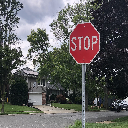

In [15]:


pic = image.load_img('/tmp/real_stop_sign.jpg', target_size = (128, 128, 1))
pic



In [16]:
pix = np.array(pic.getdata()).reshape(pic.size[0], pic.size[1], 3)


pix1 = np.array(pic)
pix1

array([[[ 37,  43,  41],
        [ 52,  62,  54],
        [ 50,  54,  65],
        ...,
        [ 69,  64,  71],
        [ 39,  36,  45],
        [ 57,  57,  65]],

       [[ 36,  42,  40],
        [ 45,  49,  48],
        [ 28,  31,  38],
        ...,
        [ 34,  34,  42],
        [ 60,  60,  68],
        [ 32,  31,  39]],

       [[ 23,  29,  27],
        [ 32,  37,  40],
        [ 21,  24,  31],
        ...,
        [ 32,  35,  44],
        [ 35,  33,  44],
        [ 24,  24,  32]],

       ...,

       [[190, 188, 189],
        [126, 124, 125],
        [154, 152, 153],
        ...,
        [ 84, 103,  57],
        [ 80,  97,  53],
        [ 71,  93,  47]],

       [[155, 153, 154],
        [142, 140, 143],
        [137, 135, 136],
        ...,
        [112, 132,  81],
        [ 89, 111,  64],
        [ 94, 114,  65]],

       [[179, 177, 178],
        [164, 162, 163],
        [161, 159, 160],
        ...,
        [ 94, 114,  63],
        [126, 146,  95],
        [101, 124,  72]]

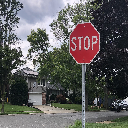

In [17]:
arr2im = Image.fromarray(pix1)
arr2im

### Example 3

Use simple function to take image and return array and vice versa.

In [18]:
import numpy as np
from PIL import Image

def pilToNumpy(img):
    return np.array(img)

def NumpyToPil(img):
    return Image.fromarray(img)

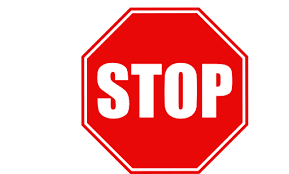

In [19]:
img = Image.open('/tmp/stop_sign.png').convert('RGB')
img

In [20]:
x = pilToNumpy(img)
x

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

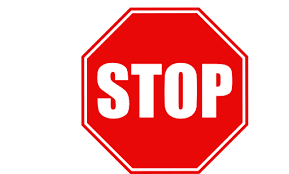

In [21]:
y = Image.fromarray(x)
y

### Example 3 

Import both color and grayscale image, convert to array and convert back to image.

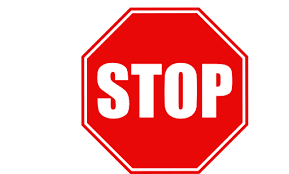

In [22]:

# Load Image:
img1 = Image.open('/tmp/stop_sign.png').convert('RGB')
img1


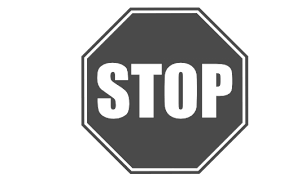

In [23]:
# Load Image with Grayscale Convert
img2 = Image.open('/tmp/stop_sign.png').convert('L')
img2


In [24]:
img1a = pilToNumpy(img1)
img1a

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [25]:
img2a = pilToNumpy(img2)
img2a

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [26]:
# Save Arrays
import pickle as pkl

pkl.dump(img1a, open("/tmp/stop_sign_array.pkl", "wb"))
pkl.dump(img2a, open("/tmp/gray_stop_sign_array.pkl", "wb"))


Load Pickle file into numpy array

In [27]:
x=np.load('/tmp/stop_sign_array.pkl', allow_pickle=True)
x

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [28]:
y=np.load('/tmp/gray_stop_sign_array.pkl', allow_pickle=True)
y

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

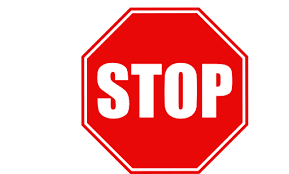

In [29]:
img1p = NumpyToPil(img1a)
img1p

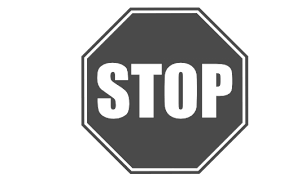

In [30]:
img2p = NumpyToPil(img2a)
img2p

In [31]:
img1p.save('/tmp/stop_sign.png')
img2p.save('/tmp/stop_sign_gray.png')